# SWOT North American Continent Hydrology Dataset

## Finding ways to visualize SWOT Hydrology River Shapefile Dataset

Authored by Nicholas Tarpinian, *PO.DAAC*

## Summary

The following tutorial is looking to explore geospatial libraries and visualizing vector datasets without the use of a GIS desktop software. Specifically looking at the latest Surface Water and Ocean Topography (SWOT) river reach hydrology dataset.

------

## Requirements

### 1. Compute environment

- **Local compute environment** e.g. laptop, server: this tutorial can be run on your local machine.
- **Utilizing Anaconda Navigator** to create your enviroments. Accessing the Conda-Forge channel to install geopsatial libraries, e.g. GDAL and GeoPandas.

### 2. Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up.

------

### Learning Objectives:
- Accessing SWOT shapefile hydrology dataset through earthaccess and visualizing it locally.
- Visualizing the dataset through the use of geospatial libraries; including Geopandas & Matplotlib.
- Visualzing either a single river reach or merging multiple reaches to a single shapefile.
- Querying specific variables of interest. 

------

### Import libraries

In [1]:
import os
import glob 
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store

## Authentication with earthaccess

In this notebook, we will be calling the authentication in the below cell.

In [2]:
auth = earthaccess.login()

### Search using `earthaccess` for SWOT River Reaches

Each dataset has it's own unique collection concept ID. For this dataset it is SWOT_L2_HR_RiverSP_2.0. We don't need 1000+ files, we just want the river reach files over North America. SWOT files come in "reach" and "node" versions in the same collection, here we want the 10km reaches rather than the nodes. We will also only get files for North America, or 'NA' via wildcard search.

In [3]:
results = earthaccess.search_data(short_name = 'SWOT_L2_HR_RIVERSP_2.0', 
                                  temporal = ('2024-01-01 00:00:00', '2024-01-21 23:59:59'), # can also specify by time
                                  granule_name = '*Reach*_NA_*') # here we filter by Reach files (not node), continent code=NA

Granules found: 136


### Download the Data into a folder

In [9]:
earthaccess.download(results, "../datasets/data_downloads/SWOT_River_Jan2024")

 Getting 136 granules, approx download size: 0.5 GB


QUEUEING TASKS | :   0%|          | 0/136 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/136 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/136 [00:00<?, ?it/s]

['SWOT_L2_HR_RiverSP_Reach_008_507_NA_20240101T092042_20240101T092050_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_509_NA_20240101T105448_20240101T105453_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_511_NA_20240101T124226_20240101T124237_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_513_NA_20240101T143224_20240101T143231_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_520_NA_20240101T195735_20240101T195745_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_522_NA_20240101T214107_20240101T214118_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_524_NA_20240101T232421_20240101T232432_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_535_NA_20240102T091313_20240102T091321_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_537_NA_20240102T105519_20240102T105524_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_539_NA_20240102T124329_20240102T124338_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_541_NA_20240102T143314_20240102T143322_PIC0_01.zip',
 'SWOT_L2_HR_RiverSP_Reach_008_548_NA_20240102T195902_20240102T195906_PIC0_0

### Unzip shapefiles to existing folder

In [10]:
folder = Path("../datasets/data_downloads/SWOT_River_Jan2024")
for item in os.listdir(folder): # loop through items in dir
    if item.endswith(".zip"): # check for ".zip" extension
        zip_ref = zipfile.ZipFile(f"{folder}/{item}") # create zipfile object
        zip_ref.extractall(folder) # extract file to dir
        zip_ref.close() # close file

### Opening a Single Shapefile

Using Geopandas to open & read a single shapefile. (Select desired single pass from list with path to downloaded shapefile)

In [11]:
River = gpd.read_file(folder / 'SWOT_L2_HR_RiverSP_Reach_008_507_NA_20240101T092042_20240101T092050_PIC0_01.shp')
River

reach_id          time      time_tai              time_str      p_lat  \
0   72350100241  7.574162e+08  7.574162e+08  2024-01-01T09:23:00Z  53.817315   
1   72350100251  7.574162e+08  7.574162e+08  2024-01-01T09:23:00Z  53.836644   
2   72350100261  7.574162e+08  7.574162e+08  2024-01-01T09:23:00Z  53.858828   
3   72350100271  7.574162e+08  7.574162e+08  2024-01-01T09:23:00Z  53.881651   
4   72350100281  7.574162e+08  7.574162e+08  2024-01-01T09:22:52Z  53.885690   
..          ...           ...           ...                   ...        ...   
56  72600000013  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.420590   
57  72600000021  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.361371   
58  72600000031  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.329352   
59  72600000041  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.370753   
60  72600000051  7.574160e+08  7.574161e+08  2024-01-01T09:20:44Z  46.434672   

        p_lon   river_name      wse     wse_u   wse_r_u  ...  p_wid_var  \
0  -57.167581  North River   0.1006   0.09299   0.02341  ...  28236.242   
1  -57.325314  North River   3.6659   0.10314   0.05039  ...   1446.494   
2  -57.446862  North River   5.9762   0.19415   0.17203  ...   1650.173   
3  -57.548691  North River  25.3041   0.45829   0.44937  ...   1482.760   
4  -57.725042  North River  93.1117  52.55793  52.55786  ...   2482.342   
..        ...          ...      ...       ...       ...  ...        ...   
56 -61.088149      no_data  -0.1532   0.09264   0.02198  ...  44587.811   
57 -61.082326      no_data   2.0284   0.11898   0.07782  ...   1417.446   
58 -61.033108      no_data  15.0109   0.53314   0.52549  ...    135.931   
59 -60.976964      no_data  41.9324   0.44099   0.43171  ...    203.002   
60 -60.936845      no_data  87.9337   2.64604   2.64451  ...    203.287   

    p_n_nodes  p_dist_out      p_length         p_maf  p_dam_id  p_n_ch_max  \
0          67   13667.285  13511.474593 -1.000000e+12         0           3   
1          51   23860.091  10192.806375 -1.000000e+12         0           2   
2          51   33994.886  10134.795305 -1.000000e+12         0           2   
3          51   44133.633  10138.746288 -1.000000e+12         0           2   
4          92   62583.220  18449.587572 -1.000000e+12         0           2   
..        ...         ...           ...           ...       ...         ...   
56         30    6150.339   5970.339067 -1.000000e+12         0           2   
57         46   15352.156   9201.816803 -1.000000e+12         0           1   
58         46   24571.736   9219.580083 -1.000000e+12         0           2   
59         46   33813.924   9242.188352 -1.000000e+12         0           1   
60         50   43742.603   9928.678873 -1.000000e+12         0           1   

    p_n_ch_mod  p_low_slp                                           geometry  
0            1          0  LINESTRING (-57.07776 53.81189, -57.07821 53.8...  
1            1          0  LINESTRING (-57.25961 53.82135, -57.26006 53.8...  
2            1          0  LINESTRING (-57.38751 53.85357, -57.38796 53.8...  
3            1          0  LINESTRING (-57.48911 53.86048, -57.48929 53.8...  
4            1          0  LINESTRING (-57.61386 53.89426, -57.61432 53.8...  
..         ...        ...                                                ...  
56           1          0  LINESTRING (-61.10688 46.44047, -61.10649 46.4...  
57           1          0  LINESTRING (-61.07715 46.39732, -61.07708 46.3...  
58           1          0  LINESTRING (-61.07836 46.32951, -61.07798 46.3...  
59           1          0  LINESTRING (-60.99366 46.34350, -60.99326 46.3...  
60           1          0  LINESTRING (-60.96300 46.40047, -60.96284 46.4...  

[61 rows x 127 columns]

### Plotting a Shapefile

Using Matplotlib to plot the shapefile, then adding a basemap for context using the library Contextily.

Contextily offers a list of basemap providers that can be easily visualized.

https://contextily.readthedocs.io/en/latest/intro_guide.html

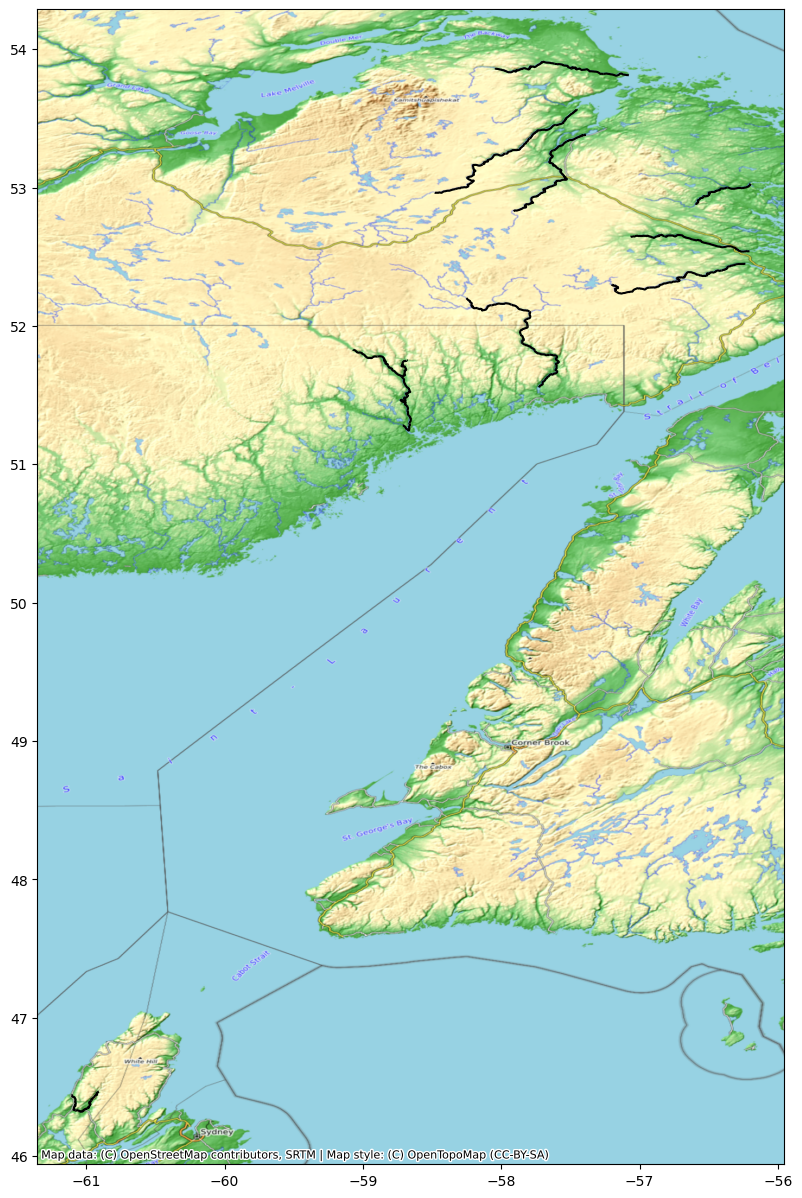

In [12]:
fig, ax = plt.subplots(figsize=(25,15))
River.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.OpenTopoMap)

### Shapefile Attribute Visualization

Shapefiles have various attributes or variables with each column signifiying individual data values.

Previously, we plotted by showcasing the full path of the river reach on the map. 

You can also plot a shapefile based on a specific variable.

Within Matplotlib you can specifiy the column parameter based on the column within the datasets attributes.

For the example below, we will look at the column 'wse' which stands for water surface elevation.

In [13]:
#First, we set all -999999999999 values to nan so that the color variation shows in the values.
River["wse"] = River.wse.apply(lambda x: x if x > -10 else np.nan)

<Axes: >

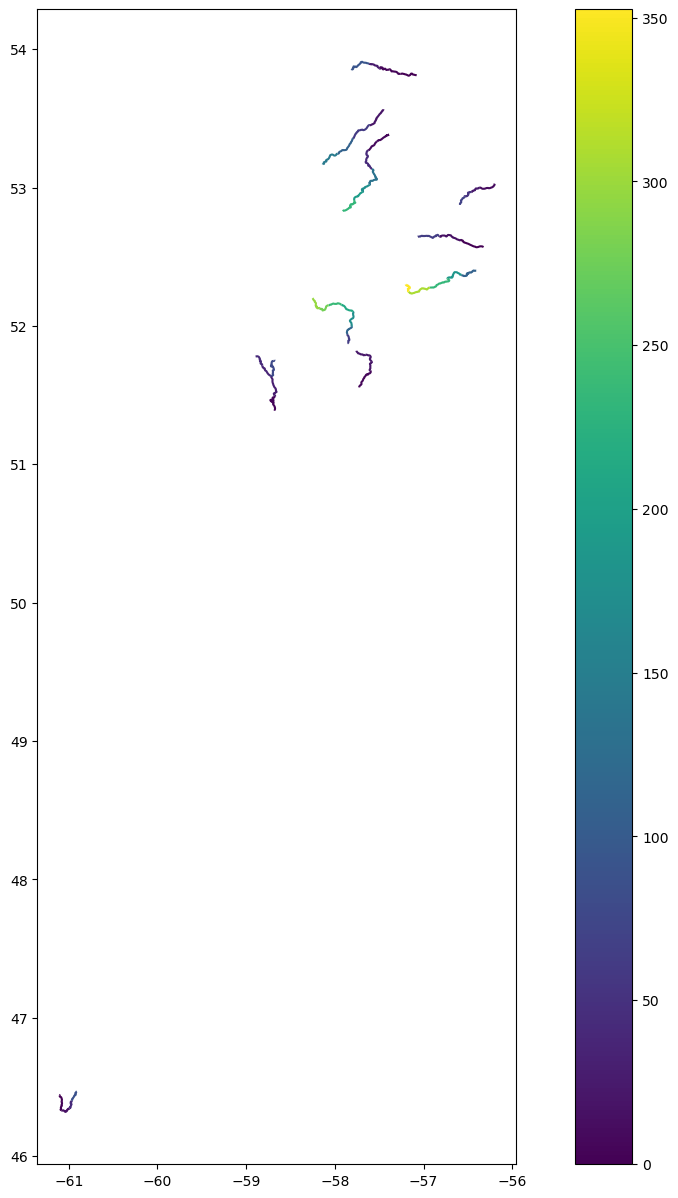

In [14]:
fig, ax = plt.subplots(figsize=(15,15))
River.plot(column='wse', ax=ax, legend=True, cmap='viridis')

### Querying a Shapefile

If you want to search for a specific reach id or a specific length of river reach that is possible through a spatial query using Geopandas. 

Utilizing comparison operators (>, <, ==, >=, <=).

In [15]:
Query = River.query("reach_id == '72600000021'")
Query

reach_id          time      time_tai              time_str      p_lat  \
57  72600000021  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.361371   

        p_lon river_name     wse    wse_u  wse_r_u  ...  p_wid_var  p_n_nodes  \
57 -61.082326    no_data  2.0284  0.11898  0.07782  ...   1417.446         46   

    p_dist_out     p_length         p_maf  p_dam_id  p_n_ch_max  p_n_ch_mod  \
57   15352.156  9201.816803 -1.000000e+12         0           1           1   

    p_low_slp                                           geometry  
57          0  LINESTRING (-61.07715 46.39732, -61.07708 46.3...  

[1 rows x 127 columns]

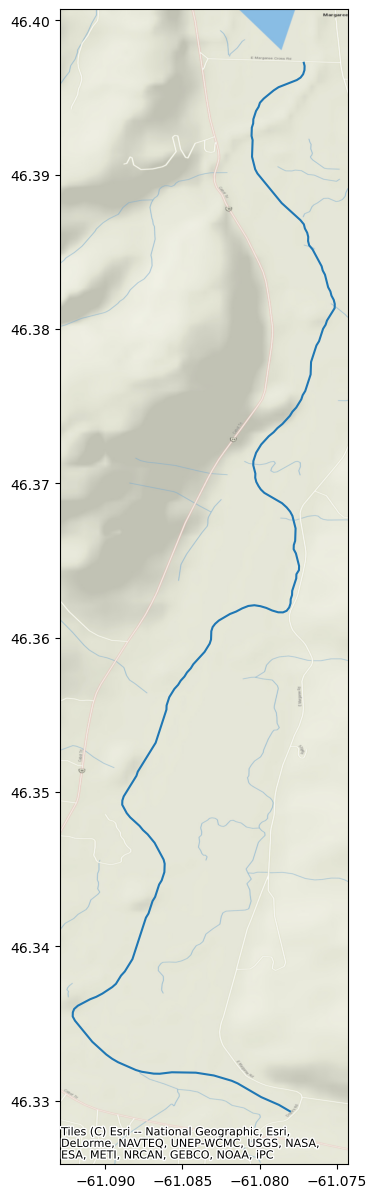

In [16]:
fig, ax = plt.subplots(figsize=(25,15))
Query.plot(ax=ax, legend=True)
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

### You can specify river reaches that have a water surface elevation greater than 35 meters.

In [17]:
WSE = River.query('wse > 35')
WSE

reach_id          time      time_tai              time_str      p_lat  \
4   72350100281  7.574162e+08  7.574162e+08  2024-01-01T09:22:52Z  53.885690   
7   72350200021  7.574162e+08  7.574162e+08  2024-01-01T09:22:50Z  53.407746   
8   72350200031  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  53.291271   
9   72350200041  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  53.211821   
17  72350400041  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  53.199366   
18  72350400051  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  53.072376   
19  72350400061  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  52.995549   
20  72350400071  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  52.940549   
21  72350400081  7.574162e+08  7.574162e+08  2024-01-01T09:22:40Z  52.865717   
23  72350500061  7.574162e+08  7.574162e+08  2024-01-01T09:22:31Z  52.379321   
24  72350500071  7.574162e+08  7.574162e+08  2024-01-01T09:22:31Z  52.367707   
25  72350500081  7.574162e+08  7.574162e+08  2024-01-01T09:22:31Z  52.305050   
26  72350500091  7.574162e+08  7.574162e+08  2024-01-01T09:22:31Z  52.254720   
27  72350500101  7.574162e+08  7.574162e+08  2024-01-01T09:22:31Z  52.276260   
30  72350500131  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  52.951334   
31  72350500141  7.574162e+08  7.574162e+08  2024-01-01T09:22:41Z  52.905828   
35  72350500205  7.574162e+08  7.574162e+08  2024-01-01T09:22:40Z  52.648312   
41  72350600061  7.574161e+08  7.574162e+08  2024-01-01T09:22:26Z  51.905820   
42  72350600071  7.574161e+08  7.574162e+08  2024-01-01T09:22:26Z  51.971792   
43  72350600081  7.574161e+08  7.574162e+08  2024-01-01T09:22:26Z  52.051760   
44  72350600091  7.574162e+08  7.574162e+08  2024-01-01T09:22:30Z  52.126138   
45  72350600101  7.574162e+08  7.574162e+08  2024-01-01T09:22:30Z  52.157979   
46  72350600111  7.574161e+08  7.574162e+08  2024-01-01T09:22:26Z  52.126854   
47  72350600121  7.574161e+08  7.574162e+08  2024-01-01T09:22:27Z  52.157207   
52  72350800051  7.574161e+08  7.574162e+08  2024-01-01T09:22:25Z  51.674779   
53  72350800061  7.574161e+08  7.574162e+08  2024-01-01T09:22:25Z  51.751588   
55  72350800111  7.574161e+08  7.574162e+08  2024-01-01T09:22:25Z  51.696292   
59  72600000041  7.574160e+08  7.574161e+08  2024-01-01T09:20:43Z  46.370753   
60  72600000051  7.574160e+08  7.574161e+08  2024-01-01T09:20:44Z  46.434672   

        p_lon      river_name       wse      wse_u    wse_r_u  ...  p_wid_var  \
4  -57.725042     North River   93.1117   52.55793   52.55786  ...   2482.342   
7  -57.710397     Eagle River   60.7161    0.46576    0.45698  ...  46522.938   
8  -57.871792     Eagle River  109.6024    0.23157    0.21336  ...  38813.919   
9  -58.062313     Eagle River  144.9110   11.71689   11.71654  ...  32577.535   
17 -57.630798  Paradise River   42.3213    0.35390    0.34226  ...  11425.095   
18 -57.566918  Paradise River  134.0474    7.14855    7.14799  ...   1268.994   
19 -57.663540  Paradise River  173.7958    0.21890    0.19954  ...   1926.735   
20 -57.741994  Paradise River  194.3889    0.09670    0.03537  ...   2051.434   
21 -57.827326  Paradise River  233.9948    0.12785    0.09080  ...    575.900   
23 -56.491851         no_data  109.2505  117.95398  117.95395  ...    162.053   
24 -56.656149         no_data  185.6737   30.18742   30.18729  ...   1524.552   
25 -56.808825         no_data  234.0462   17.98553   17.98531  ...   2232.397   
26 -57.049317         no_data  308.0438    6.65559    6.65498  ...   1251.635   
27 -57.173707         no_data  352.5435    1.44601    1.44320  ...   1527.344   
30 -56.501534         no_data   52.2107    0.10363    0.05137  ...    475.427   
31 -56.569955         no_data   69.3748    0.17727    0.15273  ...    281.924   
35 -56.938367         no_data   62.3555    8.65644    8.65597  ...   4291.177   
41 -57.846416      Saint-Paul   63.2020    5.75238    5.75168  ...    426.640   
42 -57.841991         no_data  115.4769    8.94293    8.94248  ... 

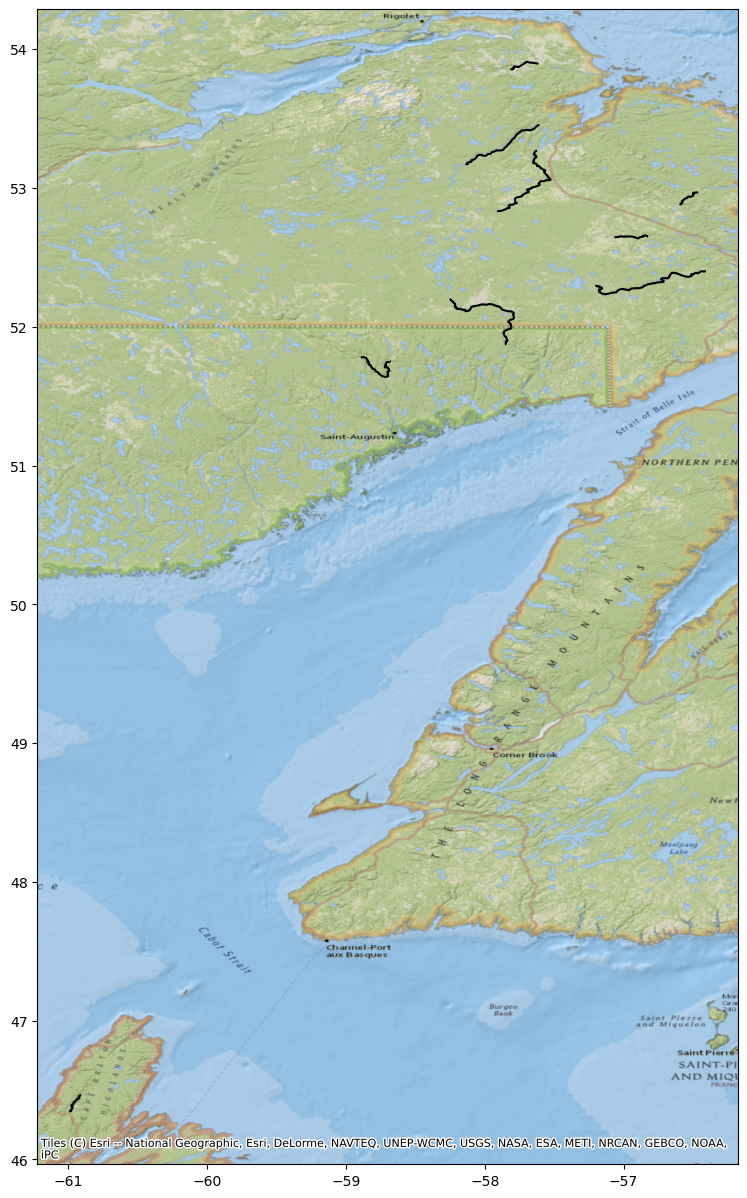

In [18]:
fig, ax = plt.subplots(figsize=(25,15))
WSE.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=River.crs, source=cx.providers.Esri.NatGeoWorldMap)

## Merging multiple reaches to a single shapefile

- If you have multiple River Reaches or Nodes in a folder, it is possible to visualize all on a single map.
- Utilizing both Glob and Pathlib libraries to read the folder, then using Pandas concat to merge the reaches to its own variable.

In [19]:
# State filename extension to look for within folder, in this case .shp which is the shapefile
shapefiles = folder.glob("*.shp")

# Merge/Combine multiple shapefiles in folder into one
gdf = pd.concat([
    gpd.read_file(shp)
    for shp in shapefiles
]).pipe(gpd.GeoDataFrame)

# Export merged geodataframe into shapefile
gdf.to_file(folder / 'SWOTReaches_Jan.shp')

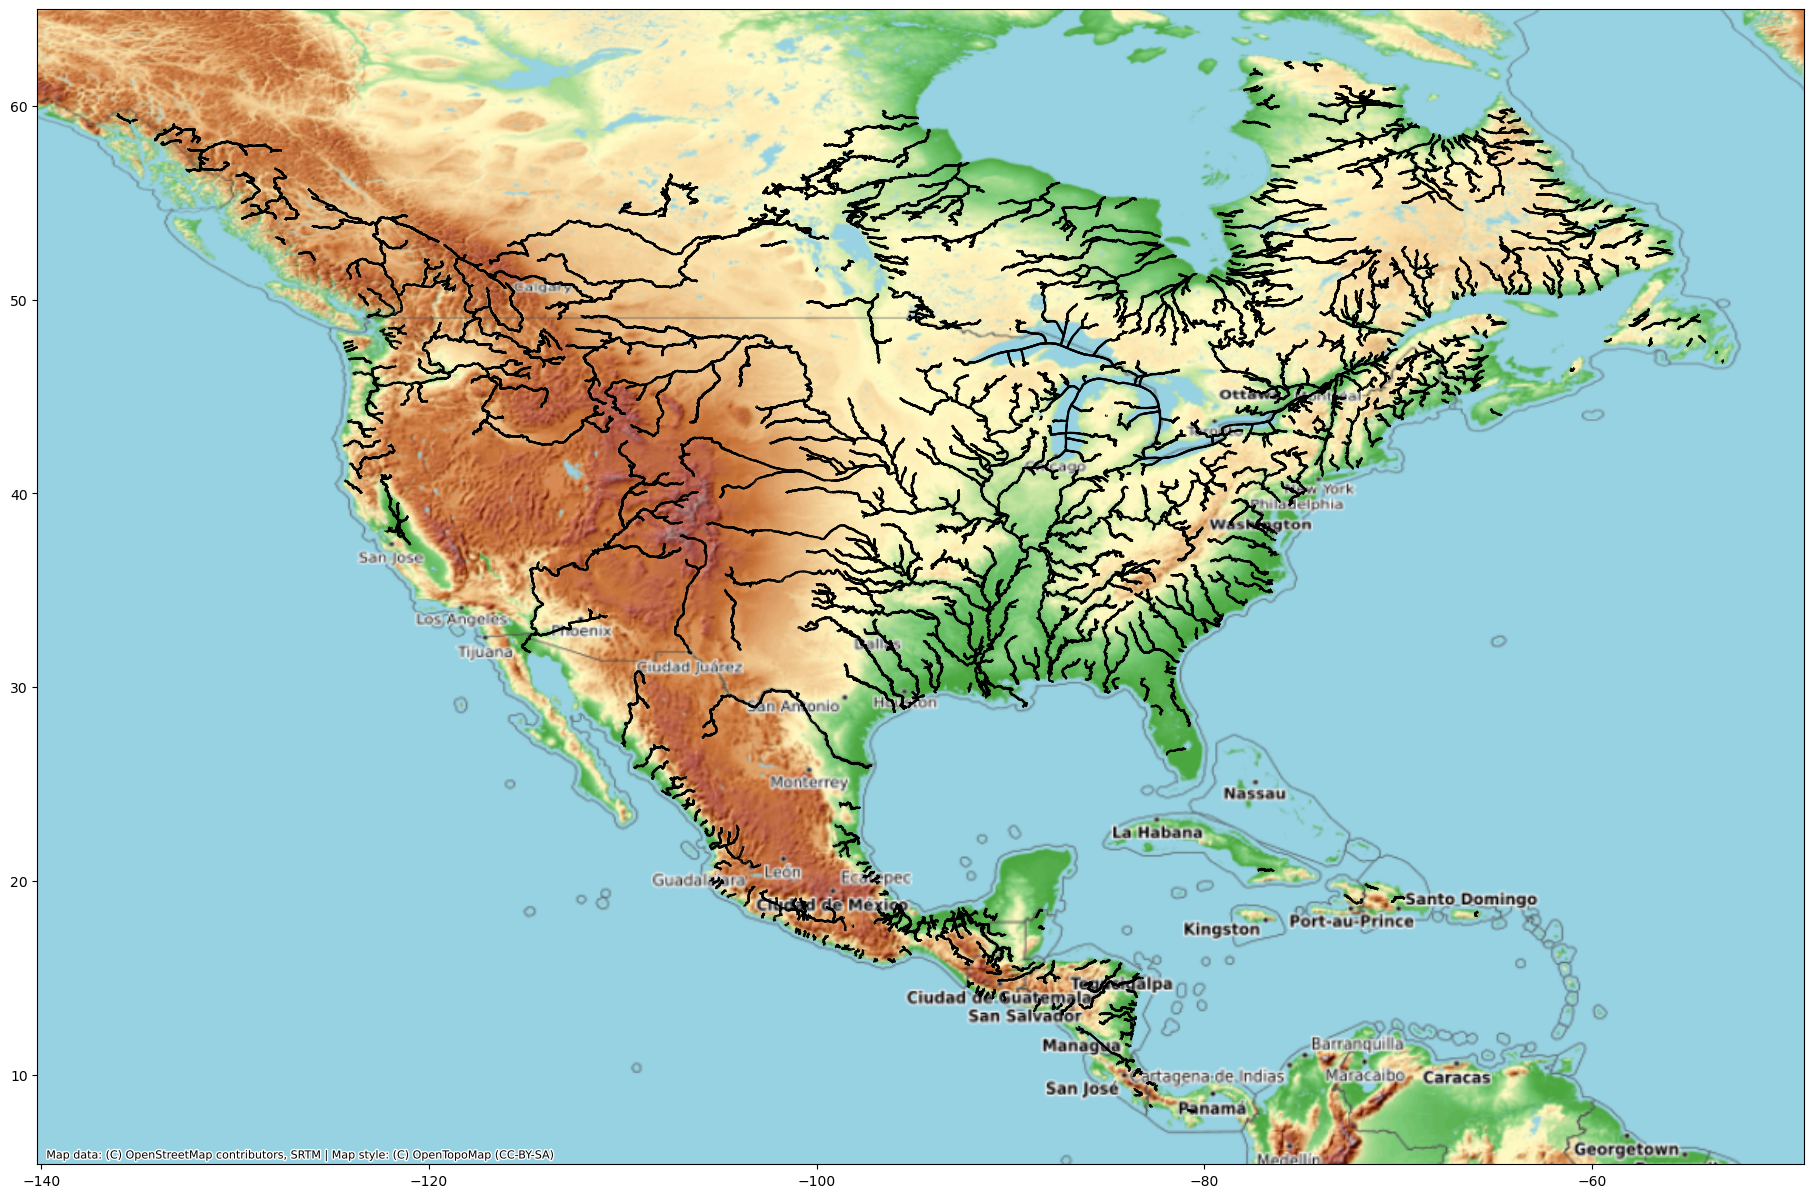

In [20]:
fig, ax = plt.subplots(figsize=(25,15))
gdf.plot(ax=ax, color='black')
cx.add_basemap(ax, crs=gdf.crs, source=cx.providers.OpenTopoMap)